In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")
df = df.sort_values(["tourney_year", "tourney_month",
                                       "tourney_day"])

2025-04-27 13:21:21,432 - data_processing.data_preprocessing - INFO - Applied one-hot encoding to ['surface', 'tourney_level', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand']
2025-04-27 13:21:22,097 - data_processing.data_preprocessing - INFO - Columns successfully dropped -> ['tourney_name', 'tourney_id', 'match_num', 'winner_name', 'loser_name', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'Unnamed: 0', 'loser_entry_S']
2025-04-27 13:21:22,170 - data_processing.data_preprocessing - INFO - 89263 rows dropped
2025-04-27 13:21:23,532 - utils.dataframe - INFO - 52630 winners assigned to player 1
2025-04-27 13:21:23,533 - utils.dataframe - INFO - 53103 winners assigned to player 2
2025-04-27 13:21:23,884 - data_processing.feature_engineering - INFO - Applying feature engineering


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105733 entries, 0 to 105538
Data columns (total 61 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   player_1_id           105733 non-null  int64  
 1   player_1_seed         105733 non-null  float64
 2   player_1_ht           105733 non-null  float64
 3   player_1_ioc          105733 non-null  int64  
 4   player_1_age          105733 non-null  float64
 5   player_1_rank         105733 non-null  float64
 6   player_1_rank_points  105733 non-null  float64
 7   player_1_entry_ALT    105733 non-null  bool   
 8   player_1_entry_Alt    105733 non-null  bool   
 9   player_1_entry_ITF    105733 non-null  bool   
 10  player_1_entry_LL     105733 non-null  bool   
 11  player_1_entry_PR     105733 non-null  bool   
 12  player_1_entry_Q      105733 non-null  bool   
 13  player_1_entry_SE     105733 non-null  bool   
 14  player_1_entry_UP     105733 non-null  bool   
 15  playe

In [58]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

array([[<Axes: title={'center': 'player_1_id'}>,
        <Axes: title={'center': 'player_1_seed'}>,
        <Axes: title={'center': 'player_1_ht'}>,
        <Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_1_age'}>],
       [<Axes: title={'center': 'player_1_rank'}>,
        <Axes: title={'center': 'player_1_rank_points'}>,
        <Axes: title={'center': 'player_2_id'}>,
        <Axes: title={'center': 'player_2_seed'}>,
        <Axes: title={'center': 'player_2_ht'}>],
       [<Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'player_2_age'}>,
        <Axes: title={'center': 'player_2_rank'}>,
        <Axes: title={'center': 'player_2_rank_points'}>,
        <Axes: title={'center': 'draw_size'}>],
       [<Axes: title={'center': 'tourney_year'}>,
        <Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>,
        <Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank

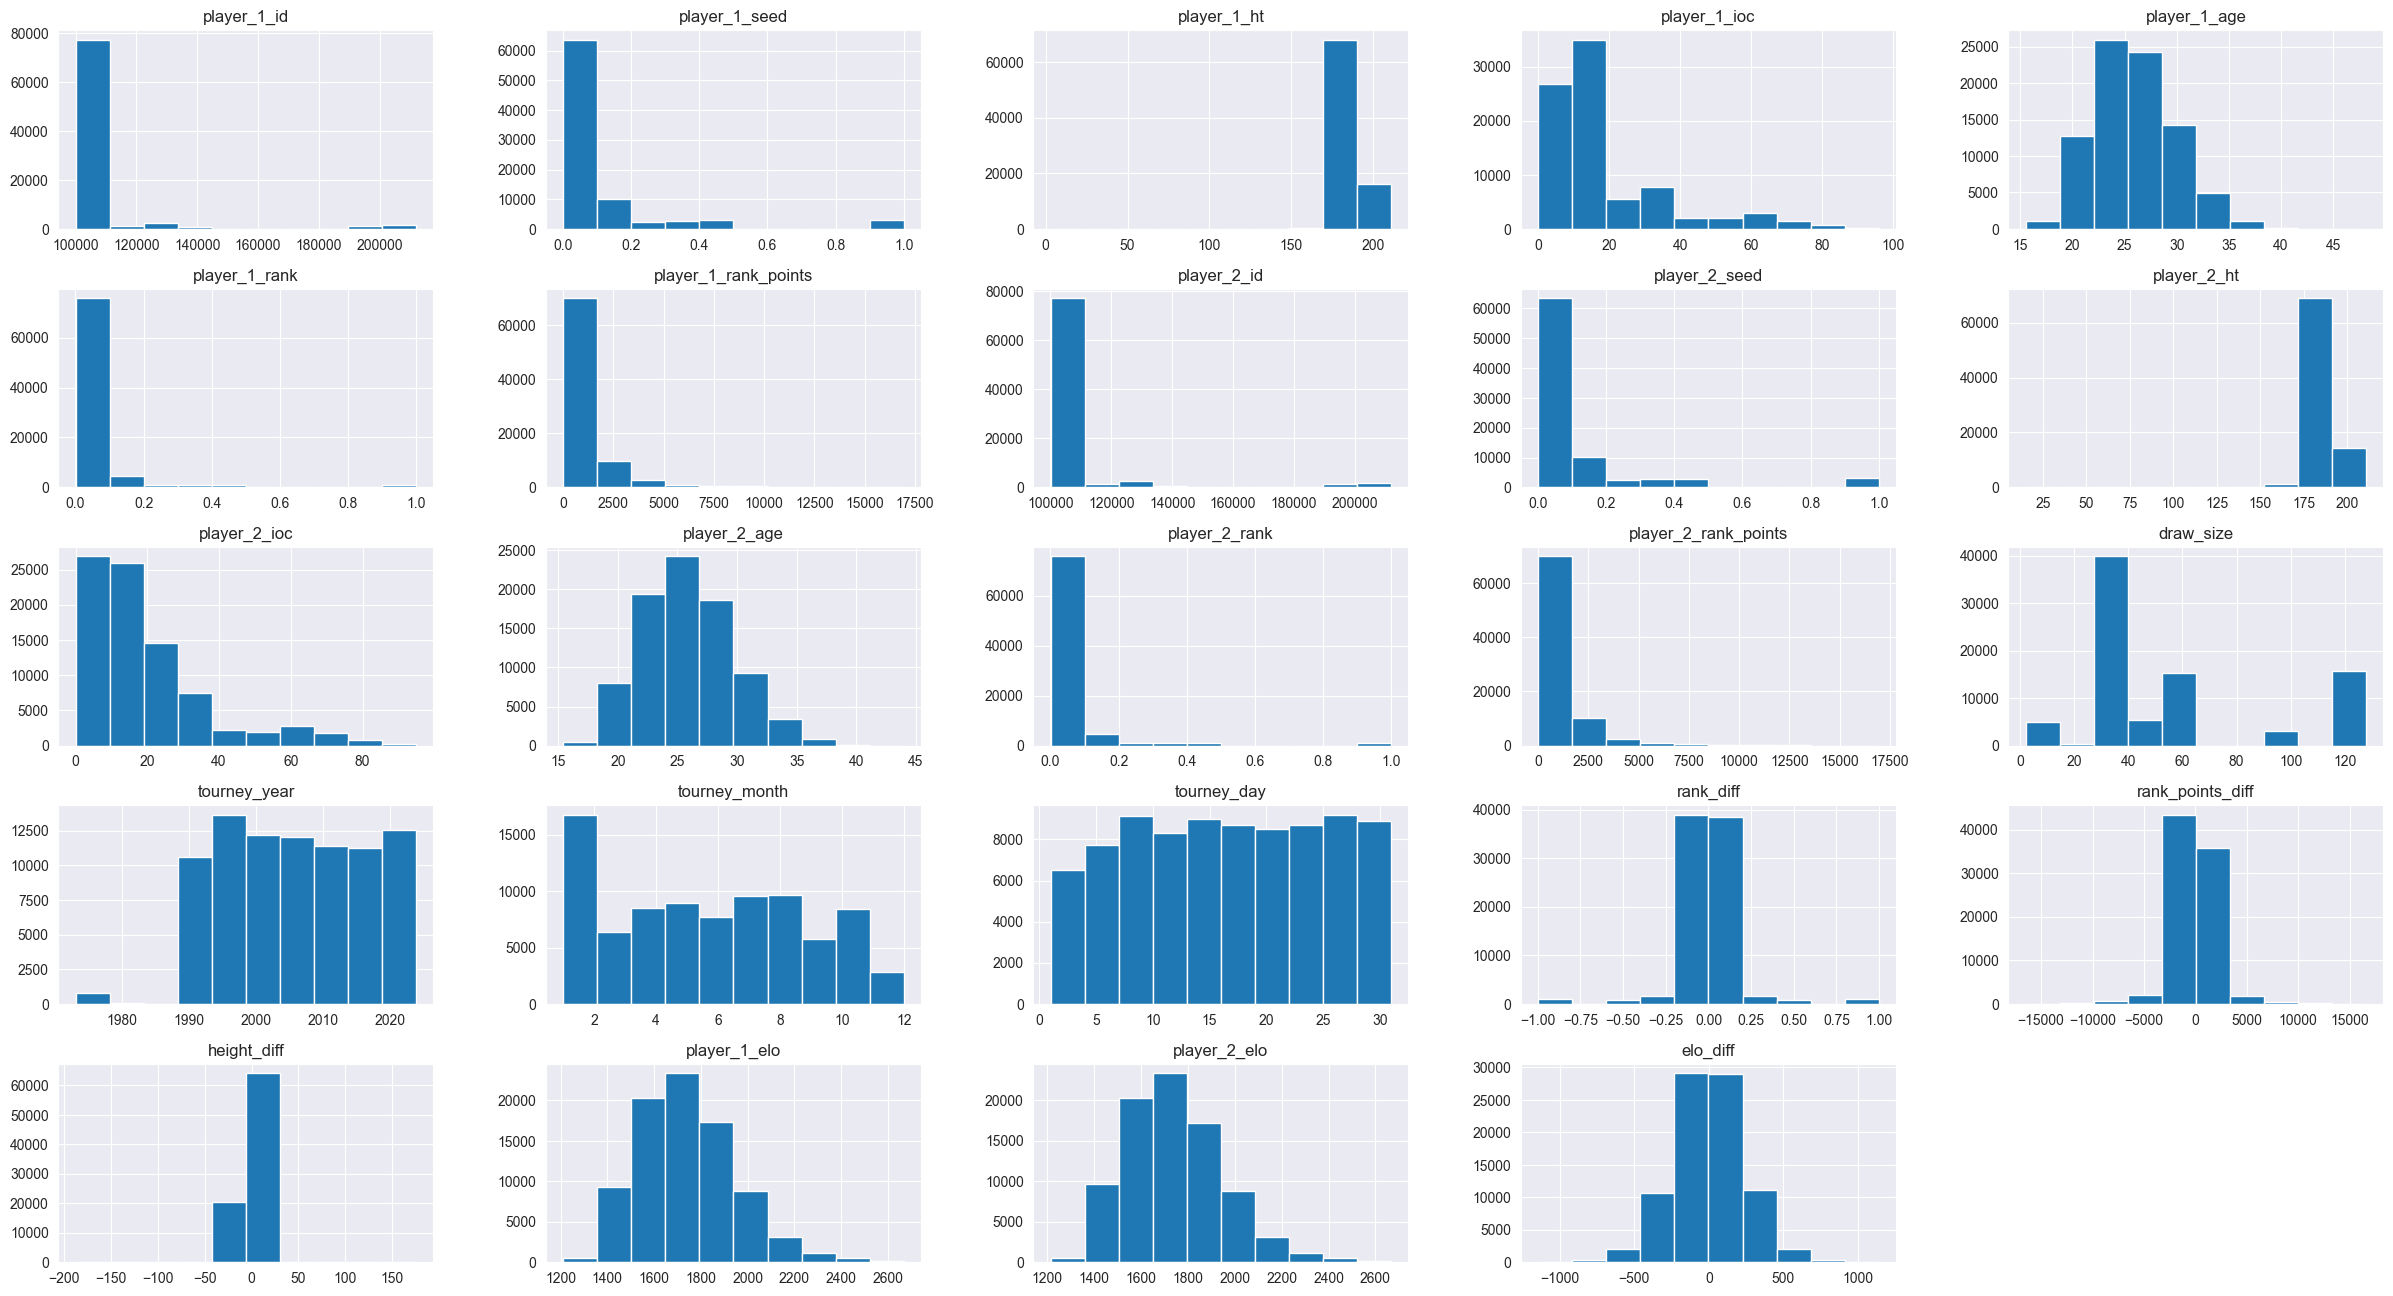

In [60]:
train_data = x_train.join(y_train)
train_data.hist(figsize = (30, 16))

<Axes: >

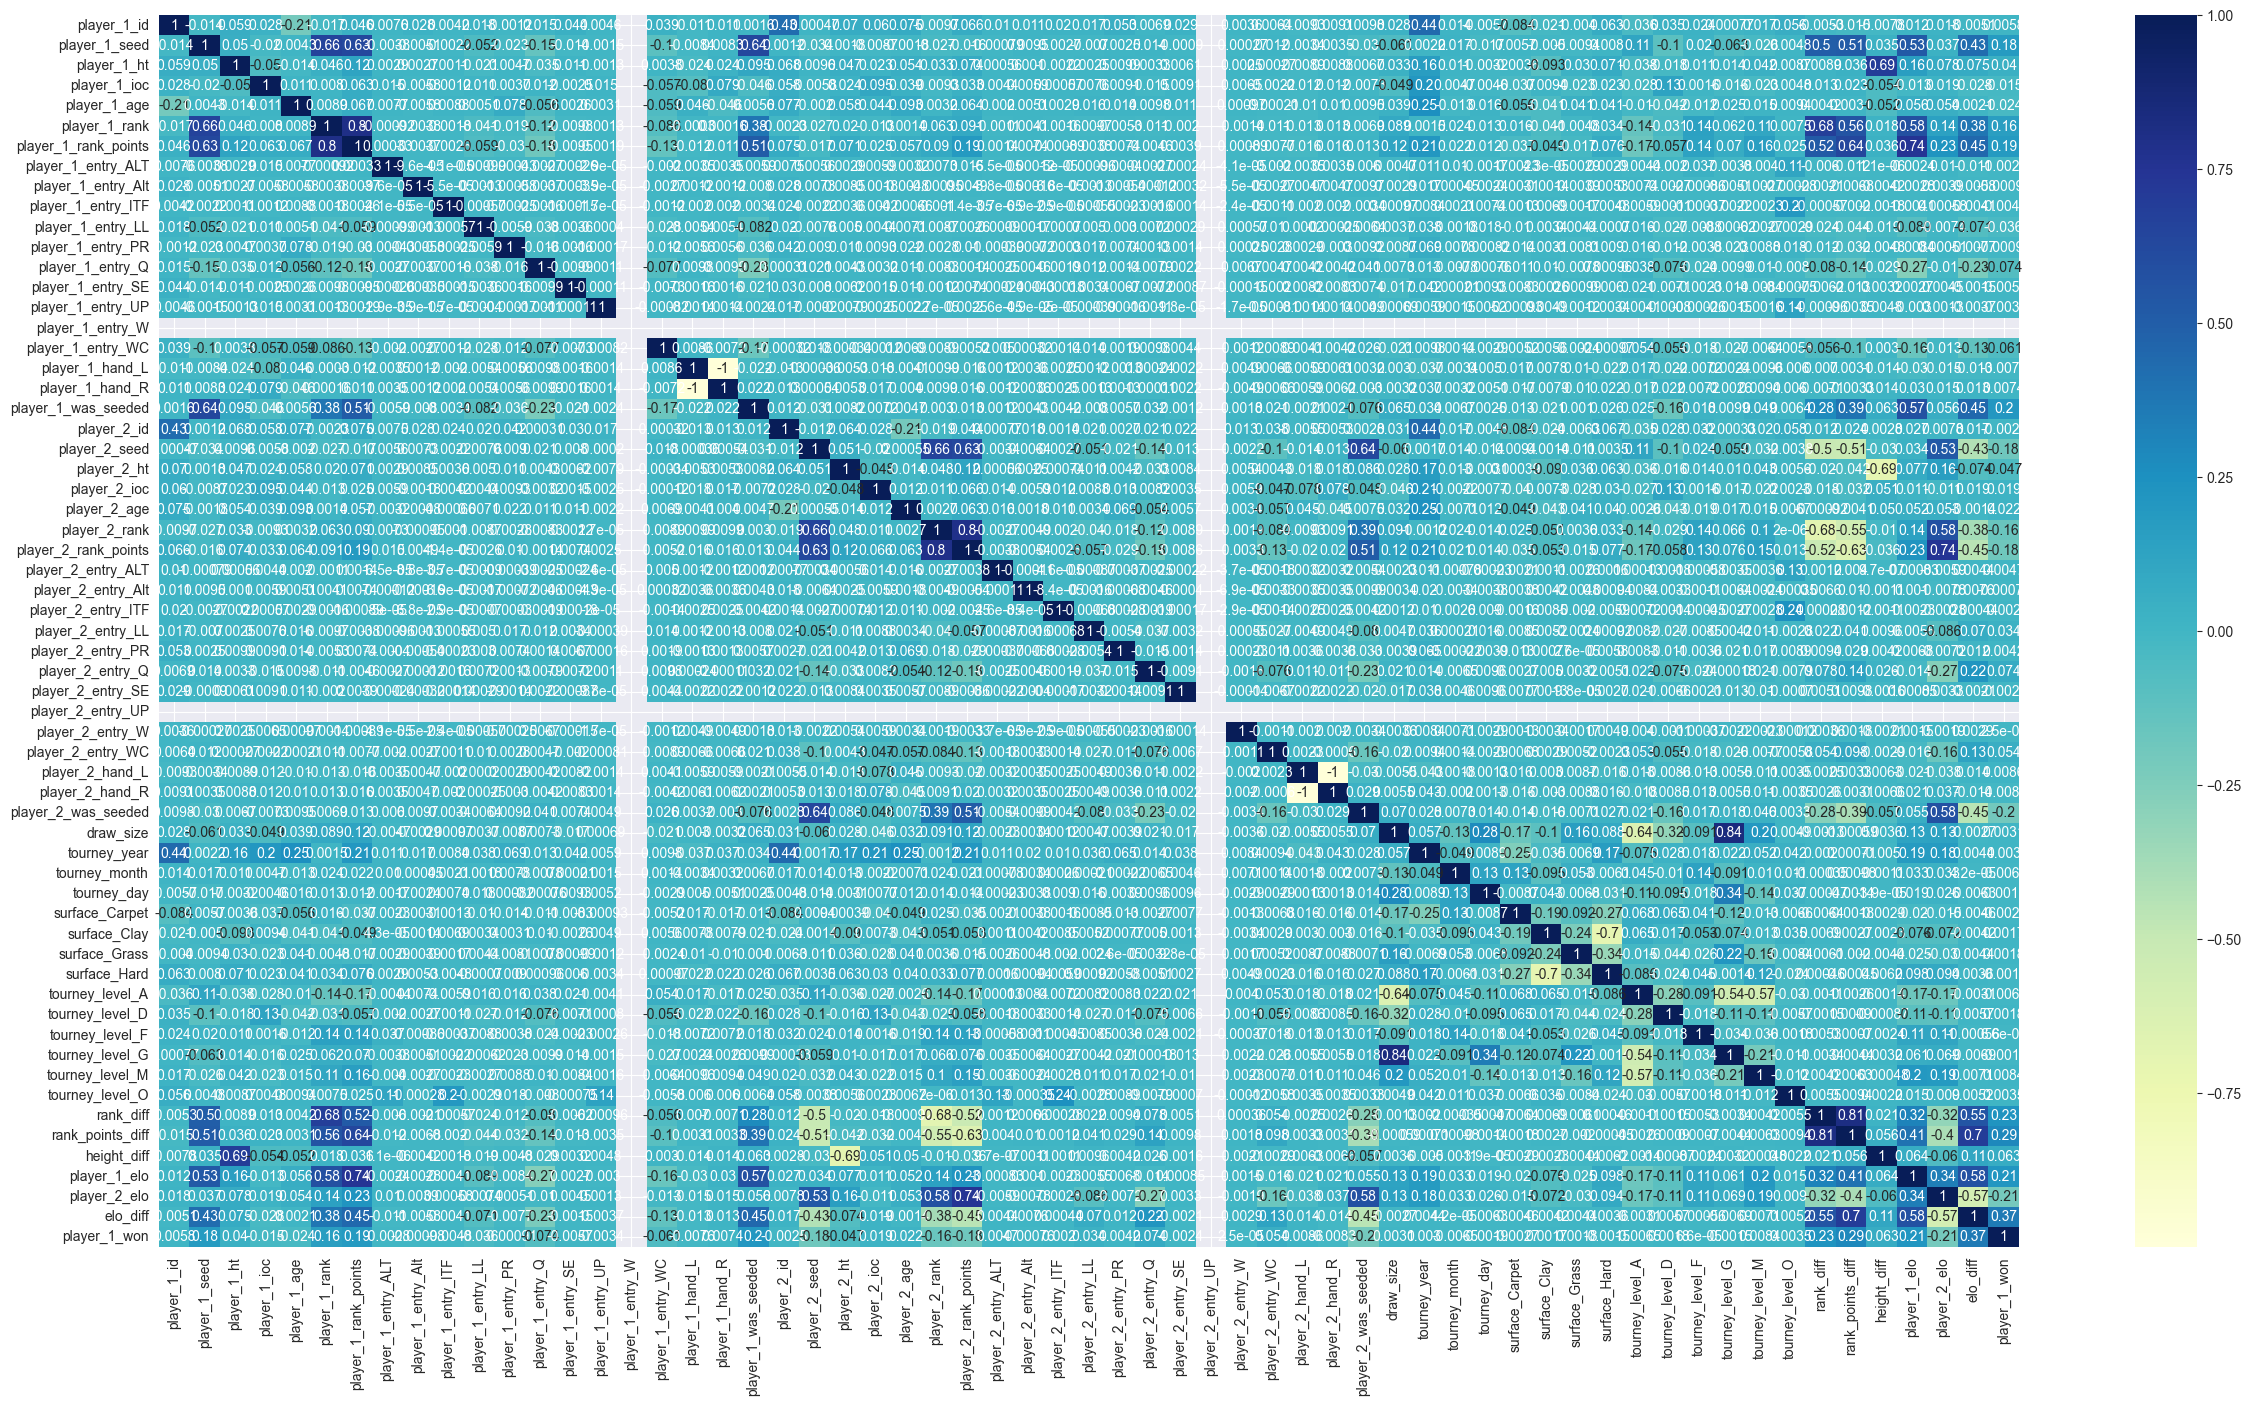

In [61]:
plt.figure(figsize = (30, 16))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

forest.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
accuracy = forest.score(x_test, y_test)
print(f"Accuracy -> {accuracy * 100}%")

Accuracy -> 65.40880503144653%


In [65]:
importances = forest.feature_importances_
feature_names = x.columns
importance_list = [[feature, importance] for feature, importance in
                   zip(feature_names, importances)]

importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance * 100}%")

elo_diff: 7.958359151280114%
rank_diff: 7.020382244910158%
rank_points_diff: 6.227853384004487%
player_1_elo: 5.131543311244389%
player_2_elo: 5.129672938009918%
player_2_rank_points: 4.525274686174361%
player_1_rank_points: 4.4890773740817655%
player_2_rank: 4.195944597078144%
player_1_age: 4.1865505403985654%
player_2_age: 4.156682134768949%
player_1_rank: 4.133529781100338%
player_2_id: 3.821125517212836%
player_1_id: 3.7839592190898594%
tourney_day: 3.3872328044075686%
height_diff: 3.1751967343143943%
player_2_ioc: 3.1533835490714117%
player_1_ioc: 3.1346879337586278%
tourney_year: 2.8882485821161494%
player_1_ht: 2.5189276709578095%
player_2_ht: 2.5094253308824506%
tourney_month: 2.3114557847709105%
player_1_seed: 1.6790557069937775%
player_2_seed: 1.603939440141826%
draw_size: 1.4486271996799784%
player_1_was_seeded: 0.7883294107608738%
surface_Hard: 0.5910034032242151%
surface_Clay: 0.5860573560061688%
player_2_was_seeded: 0.5728000541680038%
player_2_hand_L: 0.42723486606875954